In [1]:
import pandas as pd

points = []

In [2]:
data = \
"""SMU	7	0	10	1	432	231	5-1	5-0	Won 8
Clemson	7	1	9	2	414	242	5-1	4-0	Won 3
Miami (FL)	6	1	10	1	492	245	6-0	4-1	Won 1
Louisville	5	3	7	4	398	265	4-2	3-2	Won 1
Georgia Tech	5	3	7	4	307	254	5-0	1-3	Won 2
Syracuse	4	3	8	3	349	306	5-1	3-2	Won 2
Duke	4	3	8	3	299	249	5-1	3-2	Won 2
Pittsburgh	3	4	7	4	359	287	5-2	2-2	Lost 4
North Carolina	3	4	6	5	358	303	3-3	3-2	Lost 1
Boston College	3	4	6	5	317	266	5-1	1-4	Won 1
Virginia Tech	3	4	5	6	319	256	3-2	2-4	Lost 3
Virginia	3	4	5	6	255	308	2-4	3-2	Lost 2
California	2	5	6	5	307	228	4-3	2-2	Won 1
NC State	2	5	5	6	315	336	4-3	1-2	Lost 2
Wake Forest	2	5	4	7	291	367	1-5	3-2	Lost 3
Stanford	2	6	3	8	243	370	2-4	1-4	Lost 1
Florida St.	1	7	2	9	174	305	2-4	0-4	Won 1"""

In [3]:
data += """Iowa St.	6	2	9	2	345	214	5-1	4-1	Won 2
BYU	6	2	9	2	339	223	4-1	5-1	Lost 2
Arizona St.	6	2	9	2	336	251	6-0	3-2	Won 4
Colorado	6	2	8	3	362	264	4-1	4-2	Lost 1
Kansas St.	5	3	8	3	336	234	5-1	3-2	Won 1
Texas Tech	5	3	7	4	411	399	4-2	3-2	Won 1
TCU	5	3	7	4	381	304	4-2	3-2	Won 2
Baylor	5	3	7	4	371	286	4-1	3-3	Won 5
West Virginia	5	3	6	5	327	321	3-4	3-1	Won 1
Kansas	4	4	5	6	339	267	4-2	1-4	Won 3
Cincinnati	3	5	5	6	289	275	3-2	2-4	Lost 4
Houston	3	5	4	7	150	245	3-3	1-4	Lost 2
UCF	2	6	4	7	351	295	3-3	1-4	Lost 2
Arizona	2	6	4	7	254	332	3-3	1-4	Lost 1
Utah	1	7	4	7	255	234	2-4	2-3	Lost 7
Oklahoma St.	0	8	3	8	326	375	2-4	1-4	Lost 8"""

In [4]:
data += """Oregon	8	0	11	0	373	173	6-0	5-0	Won 11
Indiana	7	1	10	1	454	176	7-0	3-1	Lost 1
Ohio St.	7	1	10	1	416	118	7-0	3-1	Won 5
Penn St.	7	1	10	1	356	161	5-1	5-0	Won 3
Illinois	5	3	8	3	309	237	6-1	2-2	Won 2
Iowa	5	3	7	4	323	195	5-1	2-3	Won 1
Minnesota	4	4	6	5	292	203	4-3	2-2	Lost 2
Michigan	4	4	6	5	254	236	6-2	0-3	Won 1
Washington	4	4	6	5	249	225	6-0	0-4	Won 1
Southern California	4	5	6	5	322	233	4-1	1-4	Won 2
Rutgers	3	5	6	5	294	272	4-3	2-2	Lost 1
Nebraska	3	5	6	5	276	225	5-2	1-3	Won 1
Wisconsin	3	5	5	6	264	253	3-3	2-3	Lost 4
Michigan St.	3	5	5	6	218	272	4-2	1-4	Won 1
UCLA	3	6	4	7	201	290	1-4	3-3	Lost 2
Northwestern	2	6	4	7	186	278	2-4	2-3	Lost 2
Maryland	1	7	4	7	277	321	3-4	1-3	Lost 4
Purdue	0	8	1	10	189	413	1-5	0-5	Lost 10"""

In [5]:
data += """Jacksonville St.	7	0	8	3	408	305	5-1	3-2	Won 8
Liberty	5	2	8	2	320	236	5-1	3-1	Won 3
Sam Houston	5	2	8	3	258	222	3-1	4-2	Lost 1
Western Ky.	5	2	7	4	301	249	4-1	3-3	Lost 2
Louisiana Tech	3	4	4	7	233	246	3-2	1-5	Lost 1
FIU	2	5	3	8	281	285	3-2	0-6	Lost 2
New Mexico St.	2	5	3	8	224	393	2-3	1-5	Won 1
Middle Tenn.	2	5	3	8	193	376	2-4	1-4	Lost 2
Kennesaw St.	2	5	2	9	198	341	2-4	0-5	Won 1
UTEP	2	5	2	9	192	353	2-3	0-6	Lost 1"""

In [6]:
data += """Notre Dame	0	0	10	1	429	128	5-1	2-0	Won 9
UConn	0	0	7	4	341	244	6-1	1-3	Lost 1
Massachusetts	0	0	2	9	228	379	2-3	0-6	Lost 3"""

In [7]:
data += """Ohio	6	1	8	3	300	203	5-0	3-3	Won 4
Bowling Green	6	1	7	4	309	215	3-2	4-2	Won 5
Miami (OH)	6	1	7	4	263	196	5-1	2-3	Won 6
Buffalo	6	2	8	4	349	336	5-1	3-3	Won 4
Western Mich.	4	3	5	6	327	359	3-1	2-5	Lost 3
Toledo	4	4	7	5	320	256	4-2	3-3	Lost 2
NIU	3	4	6	5	267	205	3-2	3-3	Lost 1
Akron	3	5	4	8	245	384	3-2	1-6	Won 2
Eastern Mich.	2	5	5	6	293	309	3-3	2-3	Lost 4
Central Mich.	2	5	4	7	255	332	4-2	0-5	Won 1
Ball St.	2	5	3	8	283	439	2-3	1-5	Lost 3
Kent St.	0	8	0	12	167	529	0-5	0-7	Lost 12"""

In [8]:
data += """Boise St.	7	0	10	1	453	260	5-0	5-1	Won 9
UNLV	5	1	9	2	426	250	3-2	6-0	Won 3
Colorado St.	5	1	7	4	258	255	5-1	2-3	Lost 1
Fresno St.	4	3	6	5	306	275	4-2	2-3	Won 1
New Mexico	3	3	5	6	372	418	2-3	3-3	Won 2
Utah St.	3	3	4	7	346	411	3-3	1-4	Won 2
San Jose St.	3	4	6	5	296	286	4-2	2-3	Lost 2
Hawaii	2	4	4	7	230	282	3-3	1-4	Lost 2
Air Force	2	4	4	7	196	259	3-3	1-4	Won 3
San Diego St.	2	4	3	8	236	324	2-3	1-5	Lost 5
Wyoming	2	5	2	9	217	326	1-5	1-4	Lost 2
Nevada	0	6	3	9	286	336	2-5	1-4	Lost 5"""

In [9]:
data += """Oregon St.	1	0	5	6	273	325	4-3	1-3	Won 1
Washington St.	0	1	8	3	427	322	5-0	2-3	Lost 2"""

In [10]:
data += """Texas	6	1	10	1	401	133	6-1	3-0	Won 4
Georgia	6	2	9	2	365	204	5-0	2-2	Won 2
Tennessee	5	2	9	2	411	144	7-0	1-2	Won 1
Texas A&M	5	2	8	3	357	237	5-1	2-2	Lost 1
South Carolina	5	3	8	3	362	200	5-2	3-1	Won 5
Ole Miss	4	3	8	3	424	153	5-1	3-2	Lost 1
Alabama	4	3	8	3	398	193	6-0	2-3	Lost 1
Missouri	4	3	8	3	321	220	6-0	2-3	Won 1
LSU	4	3	7	4	315	268	5-1	2-2	Won 1
Florida	4	4	6	5	304	281	5-2	1-2	Won 2
Arkansas	3	4	6	5	342	271	4-3	2-1	Won 1
Vanderbilt	3	4	6	5	297	241	4-2	2-3	Lost 2
Oklahoma	2	5	6	5	275	222	5-2	1-2	Won 1
Auburn	2	5	5	6	319	228	4-4	1-2	Won 2
Kentucky	1	7	4	7	233	224	3-4	1-3	Lost 1
Mississippi St.	0	7	2	9	296	383	2-5	0-4	Lost 2"""

In [11]:
data += """Marshall	6	1	8	3	348	264	6-0	2-3	Won 5
Ga. Southern	5	2	7	4	309	308	3-2	4-2	Won 1
James Madison	4	3	8	3	373	214	5-0	3-3	Lost 1
App State	3	4	5	5	273	333	4-1	1-4	Won 1
Old Dominion	3	4	4	7	296	304	2-4	2-3	Lost 3
Coastal Carolina	2	5	5	6	310	340	3-3	2-3	Lost 2
Georgia St.	1	6	3	8	259	358	2-3	1-5	Won 1
Louisiana	6	1	9	2	390	250	4-2	5-0	Won 1
Arkansas St.	5	2	7	4	266	347	5-0	2-4	Won 2
South Alabama	5	2	6	5	379	259	3-2	3-3	Won 2
Texas St.	4	3	6	5	400	253	4-3	2-1	Lost 1
ULM	3	4	5	6	229	308	4-1	1-5	Lost 5
Troy	2	5	3	8	260	321	2-3	1-5	Lost 1
Southern Miss.	0	7	1	10	163	401	1-5	0-5	Lost 9"""

In [12]:
data += """Army West Point	7	0	9	1	331	142	5-0	4-0	Lost 1
Tulane	7	1	9	3	469	221	4-2	5-1	Lost 1
Memphis	6	2	10	2	422	273	7-0	2-2	Won 3
Navy	5	2	7	3	321	235	4-1	3-1	Lost 1
East Carolina	5	2	7	4	370	300	4-1	3-3	Won 4
UTSA	4	3	6	5	363	347	6-0	0-5	Won 3
South Fla.	4	3	6	5	349	313	3-2	3-2	Won 2
Charlotte	3	4	4	7	255	394	2-3	2-4	Won 1
North Texas	2	5	5	6	384	397	3-3	2-3	Lost 5
UAB	2	5	3	8	287	382	3-3	0-5	Won 1
Rice	2	5	3	8	231	277	3-2	0-6	Lost 2
Temple	2	5	3	8	218	401	3-2	0-6	Lost 1
Tulsa	1	6	3	8	284	447	2-3	1-5	Lost 3
Fla. Atlantic	0	7	2	9	248	347	2-4	0-5	Lost 6"""

In [13]:
lines = data.split('\n')
for line in lines:
    items = line.split('\t')
    points.append(pd.Series(data={'name': items[0], 'PF': items[5], 'PA': items[6]}))

df = pd.DataFrame(data=points)
df['PF'] = df['PF'].astype(float)
df['PA'] = df['PA'].astype(float)

In [14]:
import numpy as np

NUMERATOR = 2.37

df['numerator'] = df['PF'].pow(NUMERATOR)
df['denominator'] = df['PF'].pow(NUMERATOR) + df['PA'].pow(NUMERATOR)
df['expectation'] = df['numerator']/df['denominator']

In [15]:
df.sort_values(ascending=False, by='expectation').head(n=25)

,name,PF,PA,numerator,denominator,expectation
33,Ohio St.,416.0,118.0,1.611577e+06,1.692928e+06,0.951947
84,Tennessee,411.0,144.0,1.566048e+06,1.696461e+06,0.923127
87,Ole Miss,424.0,153.0,1.685998e+06,1.836561e+06,0.918019
32,Indiana,454.0,176.0,1.982542e+06,2.192371e+06,0.904291
34,Penn St.,356.0,161.0,1.114132e+06,1.284025e+06,0.867687
111,Tulane,469.0,221.0,2.141310e+06,2.501234e+06,0.856102
88,Alabama,398.0,193.0,1.451185e+06,1.712264e+06,0.847524
2,Miami (FL),492.0,245.0,2.398597e+06,2.858137e+06,0.839217
0,SMU,432.0,231.0,1.762368e+06,2.162092e+06,0.815122
86,South Carolina,362.0,200.0,1.159149e+06,1.443229e+06,0.803163


In [16]:
df.sort_values(ascending=True, by='expectation').head(n=25)

,name,PF,PA,numerator,denominator,expectation
70,Kent St.,167.0,529.0,185284.050647,3.033612e+06,0.061077
110,Southern Miss.,163.0,401.0,174938.187445,1.652182e+06,0.105883
48,Purdue,189.0,413.0,248435.970092,1.832605e+06,0.135564
55,Middle Tenn.,193.0,376.0,261078.327776,1.529300e+06,0.170718
121,Temple,218.0,401.0,348451.140111,1.825695e+06,0.190859
57,UTEP,192.0,353.0,257883.711508,1.349892e+06,0.191040
54,New Mexico St.,224.0,393.0,371610.351796,1.779960e+06,0.208775
16,Florida St.,174.0,305.0,204221.620702,9.765298e+05,0.209130
56,Kennesaw St.,198.0,341.0,277393.640923,1.283463e+06,0.216129
59,Massachusetts,228.0,379.0,387530.231157,1.679865e+06,0.230691


<Axes: xlabel='PF', ylabel='PA'>

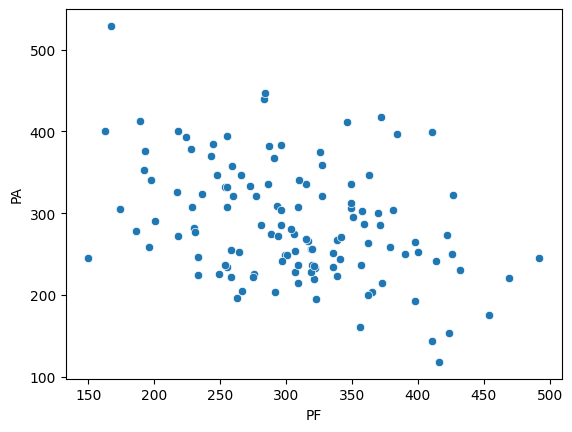

In [17]:
from seaborn import scatterplot
scatterplot(data=df, x='PF', y='PA', )